In [1]:
#!!pip install git+https://github.com/alsinmr/pyRelaxSim.git
import sys
sys.path.append('/Users/albertsmith/Documents/GitHub')
sys.path.append('/Users/albertsmith/Documents/GitHub.nosync')
import pyRelaxSim as RS
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ex0=RS.ExpSys(v0H=600,vr=0,Nucs=['13C','e'],LF=True)     #1-spin system at 600 MHz (14.1 T)
ex0.set_inter(Type='hyperfine',i0=0,i1=1,Axx=5e4,Ayy=5e5,Azz=5e5)    #Hyperfine coupling

In [6]:
L=RS.Liouvillian(ex0)
L.add_relax(Type='T2',i=1,T2=1e-13)
# L.add_relax(Type='T1',i=1,T1=1e-9)
# L.add_relax(Type='T1',i=0,T1=5)
# L.add_relax(Type='T2',i=0,T2=.1)
L.add_relax(Type='recovery')

In [7]:
U=L.U(Dt=1/100000)**500

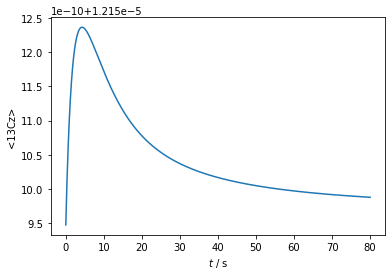

In [9]:
rho=RS.Rho(rho0='Thermal',detect='13Cz')
rho.DetProp(U,n=16000)
ax=rho.plot(FT=False,axis='s',imag=False)